In [32]:
#Adapted from binary_file_parser.py featured at https://github.com/googlecreativelab/quickdraw-dataset/blob/master/examples/binary_file_parser.py
#Some lines of code modified to better suit the data anlysis

import struct
from struct import unpack

def unpack_drawing(file_handle):
    
    key_id, = unpack('Q', file_handle.read(8)) #First 8 bytes as unsigned long 
    country_code, = unpack('2s', file_handle.read(2)) #next 2 bytes as two char string
    recognized, = unpack('b', file_handle.read(1)) # next byte as a signed char
    timestamp, = unpack('I', file_handle.read(4)) # next 4 bytes as an unsigned int
    n_strokes, = unpack('H', file_handle.read(2)) # next 2 bytes as unsigned short(length of the strokes array)
    
    image = []
    for i in range(n_strokes):
        n_points, = unpack('H', file_handle.read(2)) #get the next two bytes as unsigned short (number of points)
        fmt = str(n_points) + 'B' # format string no.of points + B, which signifies unsigned char, which is integer data type 
        # the following two lines read all the x-coordinates and all the y-coordinates as separate tuples
        x = unpack(fmt, file_handle.read(n_points)) 
        y = unpack(fmt, file_handle.read(n_points))
        image.append((x, y)) #append the tuple of the x and y points of each stroke into the image dict
    
    return {
        'key_id': key_id,
        'country_code': country_code,
        'recognized': recognized,
        'timestamp': timestamp,
        'image': image
    }


def unpack_drawings(filename):
    with open(filename, 'rb') as f: #open file for reading in binary data and give it alias of 'f'
        while True:
            try:
                yield unpack_drawing(f) #using generator with yield keyword to reduce the memory strain caused when loading the entire dataset
            except struct.error:
                break

In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style as style
import csv
import ast

def binToCSV(filepath):
    category = filepath[ ( filepath.rindex('_') + 1 ) : -4 ]
    resultpath = '../data/raw/' + category + '.csv'
    with open(resultpath,'w', newline='') as resfile:
        fields = ["key_id","country_code","recognized","timestamp","image"]
        writer = csv.DictWriter(resfile, fieldnames=fields) 
        #since the unpack method returns dictonaries, we can use csv.DictWriter() to make the code more concise
        writer.writeheader()
        for dr in unpack_drawings(filepath):
            writer.writerow(dr)
    return resultpath

In [78]:
resultpath = binToCSV('../data/raw/full_binary_circle.bin')

In [92]:
circle_df = pd.read_csv(resultpath)
images = [ast.literal_eval(lst) for lst in circle_df.loc[0:5, 'image'].values] #since the dict values are stored as strings in the csv format, we have to convert them back into lists. We can use ast for this

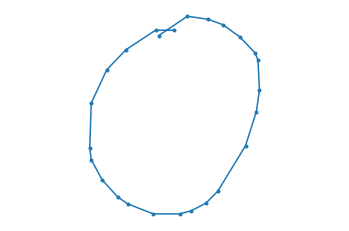

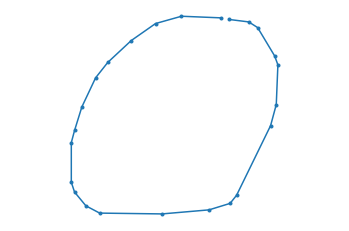

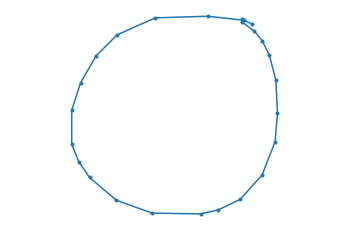

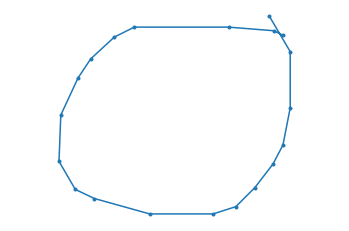

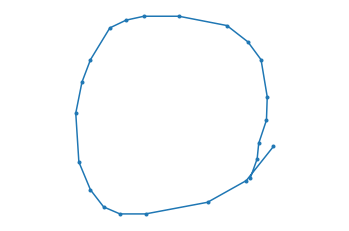

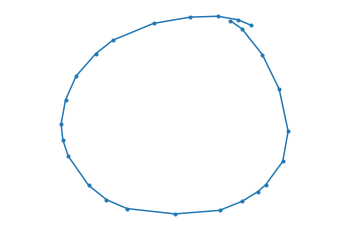

In [93]:
for dr in images:
    for x,y in dr:
        plt.plot(x, y, marker='.')
        plt.axis('off')
    plt.gca().invert_yaxis()
    plt.axis('equal')
    plt.show()